Importing all Libraries, and loding the data

In [1]:
import coltrims
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget
plt.rcParams['image.cmap'] = 'cividis'

In [19]:
df = pd.read_csv(r"dataCO-1M.zip")
#df = pd.read_pickle(r"D:\ELCH-Programm\dataCOfull-pos.zip")

Creating a reaction, which organizes the data

In [20]:
reaction = coltrims.Reaction()

reaction.add_elec(df["e1x"], df["e1y"], df["e1tof"])

reaction.add_ion(df["r1x"], df["r1y"], df["r1tof"], m=12, q=1, tofMean=3340.0)
reaction.add_ion(df["r2x"], df["r2y"], df["r2tof"], m=16, q=1, tofMean=3865.0)

Defining the Spectrometerregions

In [21]:
specElec = coltrims.Spectrometer()
specElec.magneticField = 6.0
specElec.addRegion(57, 57.4)
specElec.addRegion(117, 0)

reaction.setElectronSpectrometer(specElec)

In [22]:
specIon = coltrims.Spectrometer()
specIon.magneticField = 6.
specIon.addRegion(None, 57.4)

reaction.setIonSpectrometer(specIon)

Defining the settings to calculate postions and momenta

In [23]:
elecSettings = coltrims.CalcSettings(
    shiftX  = 0.00, shiftY  = 0.00, shiftTOF    = 0.00,
    stretchX= 1.00, stretchY= 1.00, stretchTotal= 1.00,

    rotateDeg= 130, shiftThenRotate=True,
)
reaction.setElectronSettings(elecSettings)

ionSettings = coltrims.CalcSettings(
    shiftX  = 0.00, shiftY  = 0.00, shiftTOF    = 0.00,
    stretchX= 1.00, stretchY= 1.00, stretchTotal= 1.00,
    
    rotateDeg=  60, shiftThenRotate=False,
)
reaction.setIonSettings(ionSettings)


Photoion - Photoion - Coincidence Time-of-Flight plot

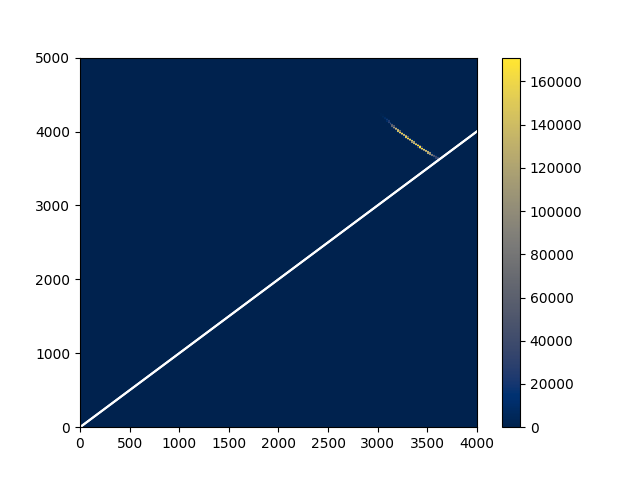

In [24]:
# Pipico
plt.close()
_,x,y,_ = plt.hist2d(reaction.i[0].tof, reaction.i[1].tof, bins=(200,300), range=((0, 4000), (0,5000)))
plt.plot(x,x,c="white")
plt.plot(y,y,c="white")
plt.colorbar()
#plt.grid("both")
plt.show()

Momentum Plots of the first and second ion

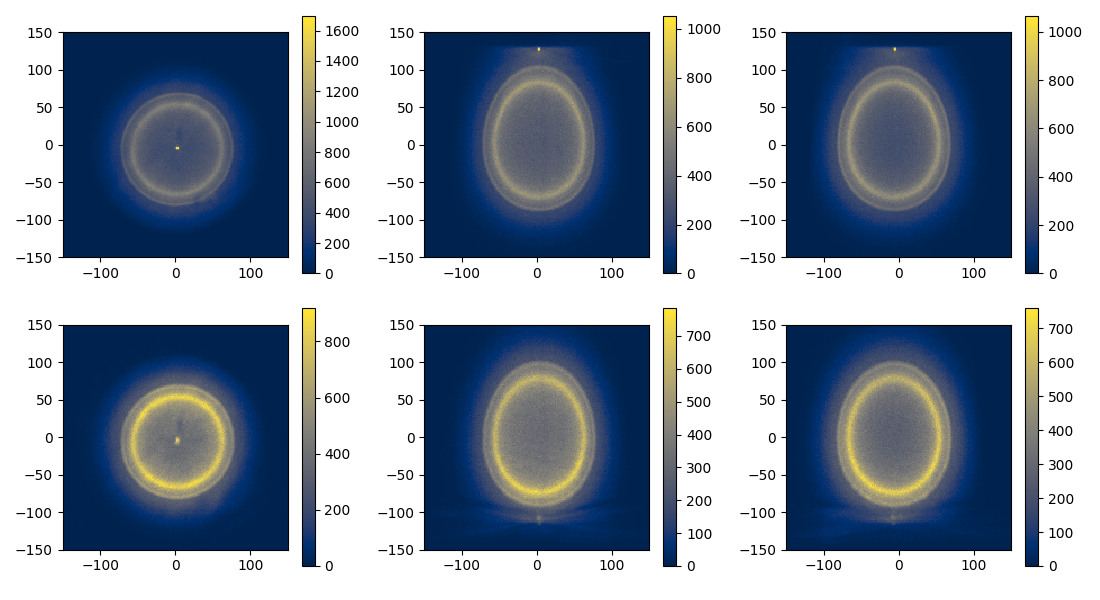

In [25]:
# Ion Momenta
plt.close()
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Ion 0
# x-y
_,_,_,plot = ax11.hist2d(reaction.i[0].px, reaction.i[0].py, bins=(200,200), range=((-150,150), (-150,150)))
ax11.set_aspect("equal")
plt.colorbar(plot, ax=ax11)
# x-z
_,_,_,plot = ax12.hist2d(reaction.i[0].px, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax12.set_aspect("equal")
plt.colorbar(plot, ax=ax12)
# y-z
_,_,_,plot = ax13.hist2d(reaction.i[0].py, reaction.i[0].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax13.set_aspect("equal")
plt.colorbar(plot, ax=ax13)

# Ion 1
# x-y
_,_,_,plot = ax21.hist2d(reaction.i[1].px, reaction.i[1].py, bins=(200,200), range=((-150,150), (-150,150)))
ax21.set_aspect("equal")
plt.colorbar(plot, ax=ax21)
# x-z
_,_,_,plot = ax22.hist2d(reaction.i[1].px, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax22.set_aspect("equal")
plt.colorbar(plot, ax=ax22)
# y-z
_,_,_,plot = ax23.hist2d(reaction.i[1].py, reaction.i[1].pz, bins=(200,200), range=((-150,150), (-150,150)))
ax23.set_aspect("equal")
plt.colorbar(plot, ax=ax23)

fig.tight_layout()
plt.show()

Momentum and Energy plots of the fotoelectron

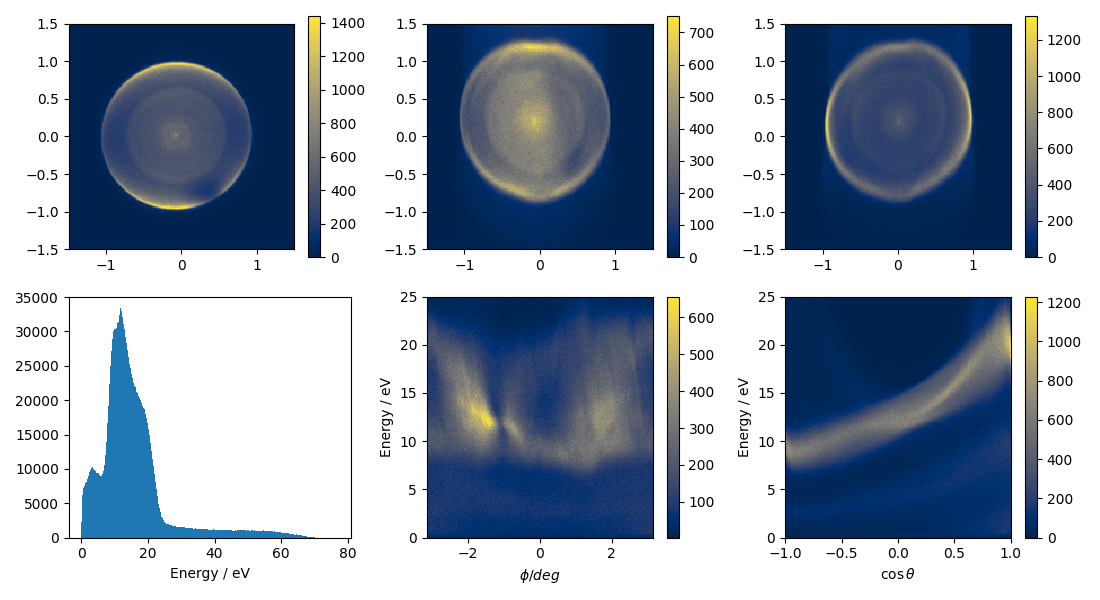

In [26]:
# Electron Momenta
plt.close()
fig, ((ax31, ax32, ax33),(ax41, ax42, ax43)) = plt.subplots(nrows=2, ncols=3, figsize=(11,6))

# Electron 0
# x-y
_,_,_,plot = ax31.hist2d(reaction.e[0].px, reaction.e[0].py, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax31.set_aspect("equal")
plt.colorbar(plot, ax=ax31)
# x-z
_,_,_,plot = ax32.hist2d(reaction.e[0].px, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax32.set_aspect("equal")
plt.colorbar(plot, ax=ax32)
# y-z
_,_,_,plot = ax33.hist2d(reaction.e[0].py, reaction.e[0].pz, bins=(200,200), range=((-1.50,1.50), (-1.50,1.50)))
ax33.set_aspect("equal")
plt.colorbar(plot, ax=ax33)
# Energy
ax41.hist(reaction.e[0].energy, bins=1000)
ax41.set_xlabel("Energy / eV")
#ax41.grid("both")
# Energy-phi
#_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].py), reaction.e[0].energy, bins=(200,200), range=((-2*np.pi,2*np.pi),(0, 10)))
_,_,_,plot = ax42.hist2d(np.arctan2(reaction.e[0].py, reaction.e[0].px), reaction.e[0].energy, bins=(200,200), range=((-np.pi,np.pi),(0, 25)))
ax42.set_xlabel("$\\phi / deg$")
ax42.set_ylabel("Energy / eV")
plt.colorbar(plot, ax=ax42)
# Energy-cosTheta
_,_,_,plot = ax43.hist2d(reaction.e[0].pz/reaction.e[0].p, reaction.e[0].energy, bins=(200,200), range=((-1,1),(0,25)))
ax43.set_xlabel("$\\cos\\theta$")
ax43.set_ylabel("Energy / eV")
plt.colorbar(plot, ax=ax43)

fig.tight_layout()
plt.show()

Definition of the Molecular Frame, trainsformation of the fotoelectron into the molecular frame, and MFPAD

In [27]:
momDiff    = reaction.i[0] - reaction.i[1]
angleLight = np.arccos(momDiff*[0,1,0] / (momDiff.p + 1))

coordinateSystem = coltrims.CoordinateSystem(momDiff, np.array([0,1,0]))

In [28]:
eCS = coordinateSystem(reaction.e[0])

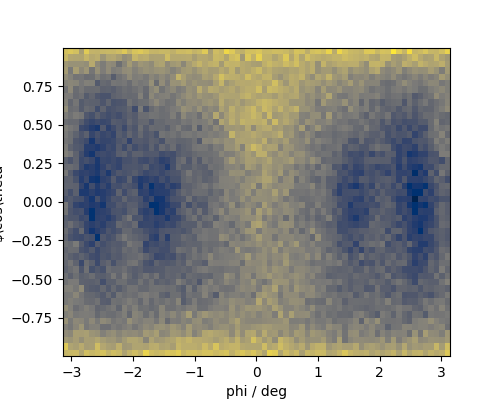

In [29]:
# MFPAD
plt.close()
fig, ax51 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax51.hist2d(np.arctan2(eCS.py, eCS.px), eCS.pz/eCS.p, bins=(2*36,2*24))
ax51.set_xlabel("phi / deg")
ax51.set_ylabel("$\\cos\\theta")

plt.show()
